<a href="https://colab.research.google.com/github/aishaar1-blip/ENEC---DELL-Technologies-Training/blob/main/Copy_of_modellling_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -----------------------------------------------------------
# Advanced 5-Year Abu Dhabi Weather Data (Open-Meteo Archive)
# -----------------------------------------------------------
import pandas as pd
import requests
from datetime import date

# Abu Dhabi coordinates
LAT, LON = 24.4539, 54.3773

# Date range (last 5 years)
start_date = "2019-01-01"
end_date = date.today().strftime("%Y-%m-%d")

# Request multiple variables
url = (
    "https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={LAT}&longitude={LON}"
    f"&start_date={start_date}&end_date={end_date}"
    "&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,"
    "apparent_temperature_max,apparent_temperature_min,"
    "precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,"
    "windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,"
    "shortwave_radiation_sum,et0_fao_evapotranspiration,"
    "sunshine_duration,pressure_msl_min,pressure_msl_max"
    "&timezone=Asia/Dubai"
)

# Fetch data
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data["daily"])
df["time"] = pd.to_datetime(df["time"])

# Save dataset
df.to_csv("abu_dhabi_weather_5yrs_full.csv", index=False)
print(f"✅ Saved {len(df)} days of data to abu_dhabi_weather_5yrs_full.csv")

# Preview
df.head()


✅ Saved 2515 days of data to abu_dhabi_weather_5yrs_full.csv


,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,sunshine_duration,pressure_msl_min,pressure_msl_max
0,2019-01-01,25.0,17.5,21.5,25.0,18.1,0.0,0.0,0.0,0.0,14.6,28.4,26,15.02,3.09,33226.16,1019.4,1023.4
1,2019-01-02,26.7,18.6,22.0,26.3,19.5,0.0,0.0,0.0,0.0,16.2,28.4,56,15.09,3.29,33415.02,1018.5,1022.3
2,2019-01-03,29.3,17.5,22.8,28.0,17.2,0.0,0.0,0.0,0.0,18.6,33.1,141,15.05,3.65,33058.73,1017.6,1022.4
3,2019-01-04,25.1,18.6,21.8,25.7,17.7,0.0,0.0,0.0,0.0,30.5,44.3,297,14.80,3.76,33289.27,1018.6,1021.3
4,2019-01-05,23.4,19.2,21.4,22.1,17.6,0.0,0.0,0.0,0.0,30.0,43.9,314,15.54,4.20,33609.33,1018.3,1022.1


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("abu_dhabi_weather_5yrs_full.csv")
df["time"] = pd.to_datetime(df["time"])

# Preview
print(df.shape)
df.head()

# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Summary stats
print("\nDescriptive Statistics:")
display(df.describe().T)


(2515, 18)

Missing values per column:
time                          0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
shortwave_radiation_sum       0
et0_fao_evapotranspiration    0
sunshine_duration             0
pressure_msl_min              0
pressure_msl_max              0
dtype: int64

Descriptive Statistics:


,count,mean,min,25%,50%,75%,max,std
time,2515,2022-06-11 00:00:00.000000256,2019-01-01 00:00:00,2020-09-20 12:00:00,2022-06-11 00:00:00,2024-02-29 12:00:00,2025-11-19 00:00:00,NaN
temperature_2m_max,2515.0,33.104692,18.3,27.3,34.1,38.4,46.5,6.576643
temperature_2m_min,2515.0,25.235348,13.3,20.4,25.8,30.0,35.8,5.372409
temperature_2m_mean,2515.0,28.729622,17.0,23.6,29.6,33.8,39.1,5.580794
apparent_temperature_max,2515.0,34.532525,13.4,27.1,35.7,42.0,49.8,8.384807
apparent_temperature_min,2515.0,27.508072,8.5,20.25,28.1,34.9,42.4,8.049228
precipitation_sum,2515.0,0.179642,0.0,0.0,0.0,0.0,67.7,2.40547
rain_sum,2515.0,0.179642,0.0,0.0,0.0,0.0,67.7,2.40547
snowfall_sum,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precipitation_hours,2515.0,0.200795,0.0,0.0,0.0,0.0,21.0,1.21506


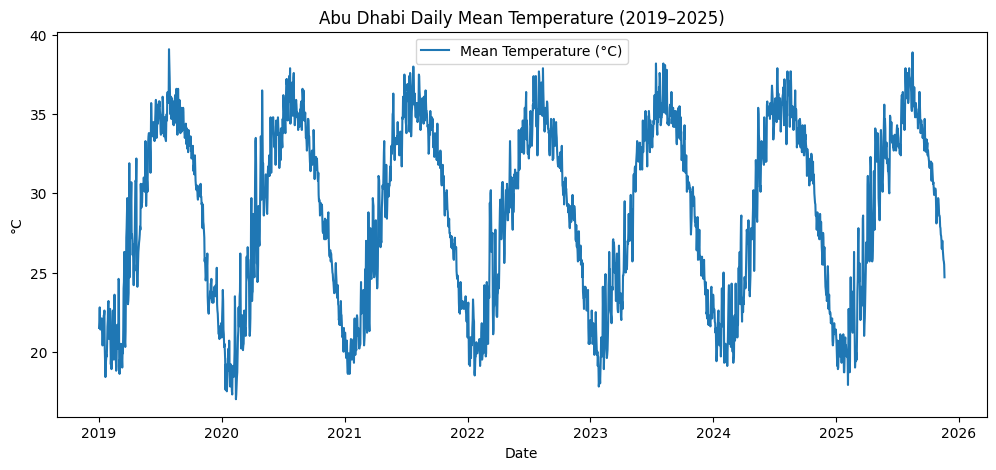

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df["time"], df["temperature_2m_mean"], label="Mean Temperature (°C)")
plt.title("Abu Dhabi Daily Mean Temperature (2019–2025)")
plt.xlabel("Date"); plt.ylabel("°C")
plt.legend(); plt.show()


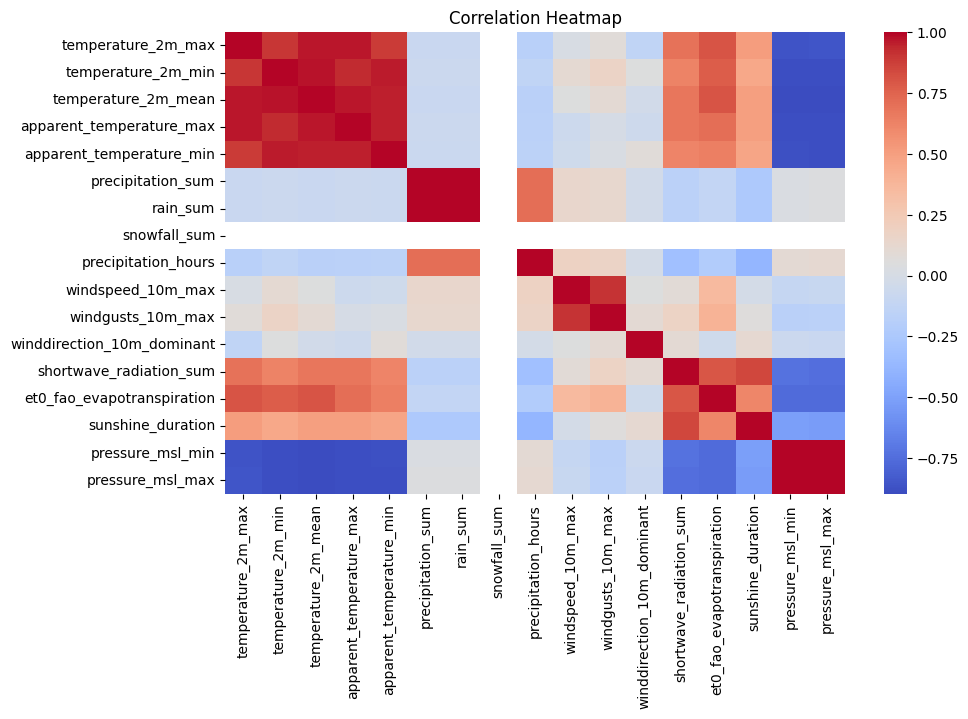

temperature_2m_mean           1.000000
temperature_2m_min            0.976068
apparent_temperature_max      0.969744
temperature_2m_max            0.967766
apparent_temperature_min      0.948866
et0_fao_evapotranspiration    0.806869
shortwave_radiation_sum       0.675829
sunshine_duration             0.499411
windgusts_10m_max             0.101251
windspeed_10m_max             0.047310
winddirection_10m_dominant   -0.030640
precipitation_sum            -0.083953
rain_sum                     -0.083953
precipitation_hours          -0.173783
pressure_msl_min             -0.892265
pressure_msl_max             -0.896259
snowfall_sum                       NaN
Name: temperature_2m_mean, dtype: float64


In [ ]:
# Drop non-numeric or redundant columns
df_model = df.drop(columns=["time", "temperature_2m_mean"])

# Define X (features) and y (target)
X = df_model
y = df["temperature_2m_mean"]

# Correlation check
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Optional: drop weakly correlated features (< 0.2 correlation with target)
corr_with_target = df.corr(numeric_only=True)["temperature_2m_mean"].sort_values(ascending=False)
print(corr_with_target)


In [ ]:
#3. Train-Test Split
from sklearn.model_selection import train_test_split

# 80% train, 20% test split
split_index = int(0.8 * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 2012, Testing samples: 503


In [ ]:
#4. Train the Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model.coef_})
print(coefficients.sort_values(by="Coefficient", ascending=False))


        Feature  Coefficient
4         lag_1     0.608506
7   roll_mean_7     0.251322
6        lag_14     0.051028
0         month     0.018378
1   day_of_year    -0.000162
5         lag_7    -0.002698
8  roll_mean_14    -0.041286
2    sin_annual    -0.226956
3    cos_annual    -1.004656



Model Performance:
Mean Squared Error: 0.14
Mean Absolute Error: 0.30
R² Score: 0.995


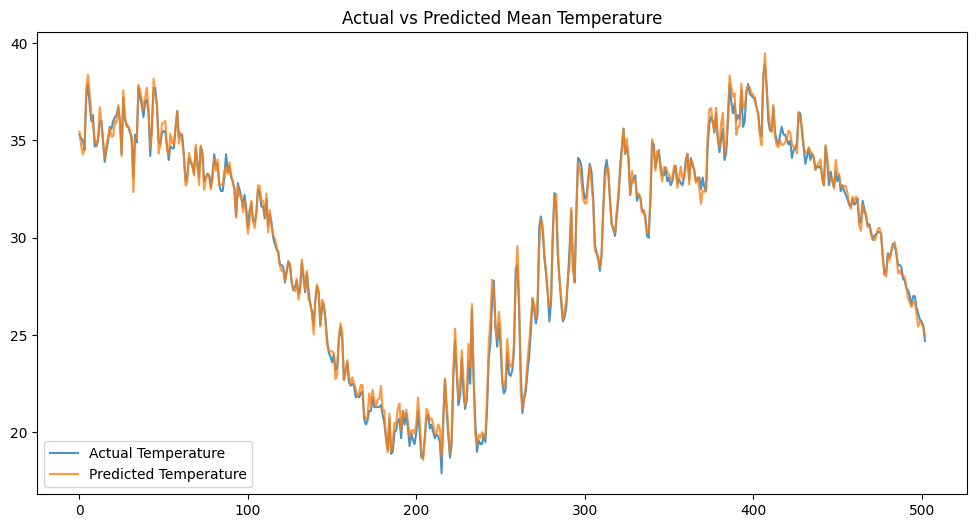

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# Compare Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Temperature", alpha=0.8)
plt.plot(y_pred, label="Predicted Temperature", alpha=0.8)
plt.legend(); plt.title("Actual vs Predicted Mean Temperature"); plt.show()


Shape: (2515, 18)

Columns: ['time', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max', 'winddirection_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'sunshine_duration', 'pressure_msl_min', 'pressure_msl_max']

Head:
        time  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0 2019-01-01                25.0                17.5                 21.5   
1 2019-01-02                26.7                18.6                 22.0   
2 2019-01-03                29.3                17.5                 22.8   
3 2019-01-04                25.1                18.6                 21.8   
4 2019-01-05                23.4                19.2                 21.4   

   apparent_temperature_max  apparent_temperature_min  precipitation_sum  \
0                      25.0     

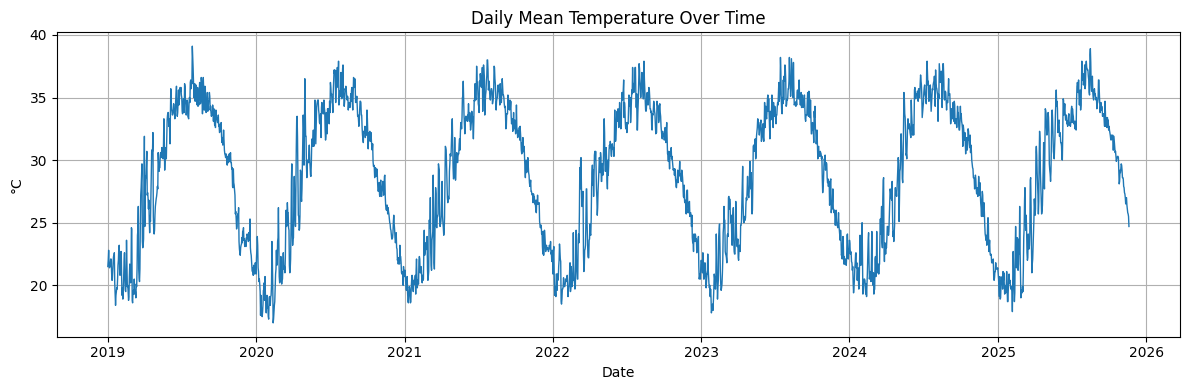


Train size: 2136, Test size (last 365 days): 365
Features used: ['month', 'day_of_year', 'sin_annual', 'cos_annual', 'lag_1', 'lag_7', 'lag_14', 'roll_mean_7', 'roll_mean_14']

=== Holdout Performance (last 365 days) ===
MAE: 0.831 °C
MSE: 1.231
RMSE: 1.110 °C
R²: 0.9615


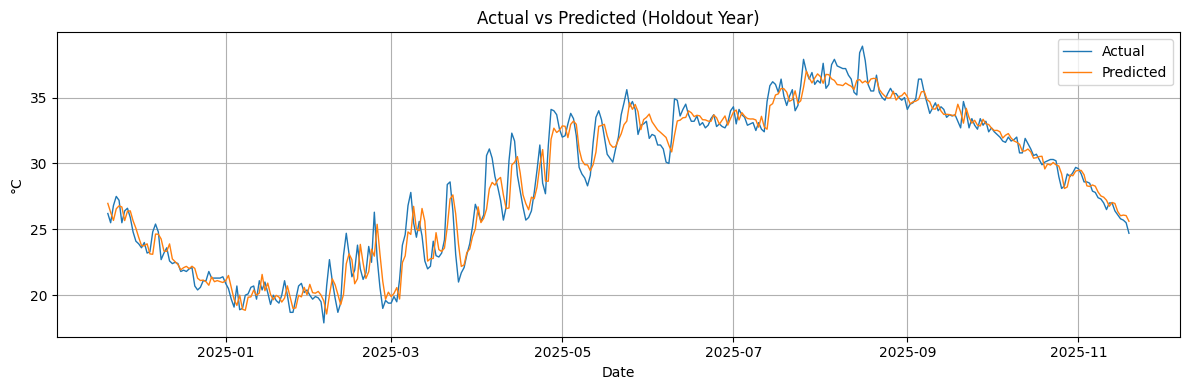


Top Feature Importances:
        feature  importance
4         lag_1    0.866135
7   roll_mean_7    0.106189
6        lag_14    0.005706
8  roll_mean_14    0.005226
5         lag_7    0.005218
3    cos_annual    0.004259
2    sin_annual    0.003571
1   day_of_year    0.003357
0         month    0.000338


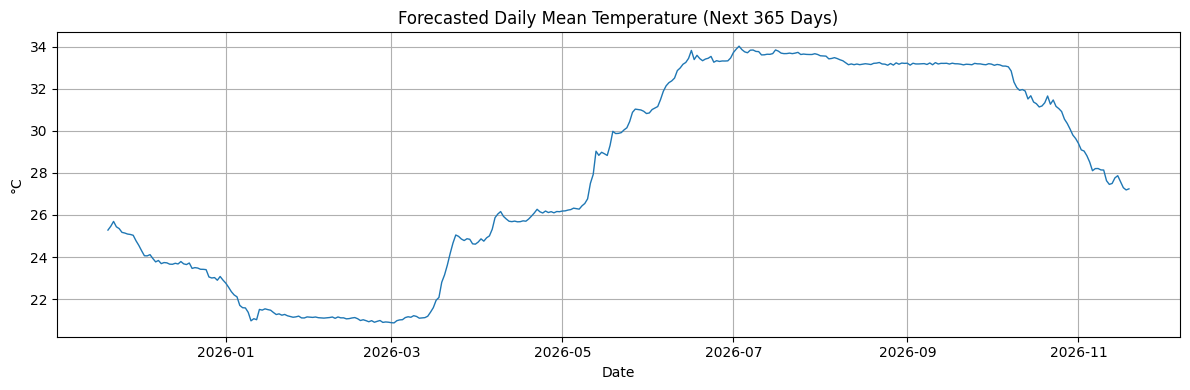


Saved forecast to: abu_dhabi_temperature_forecast_next_365_days.csv


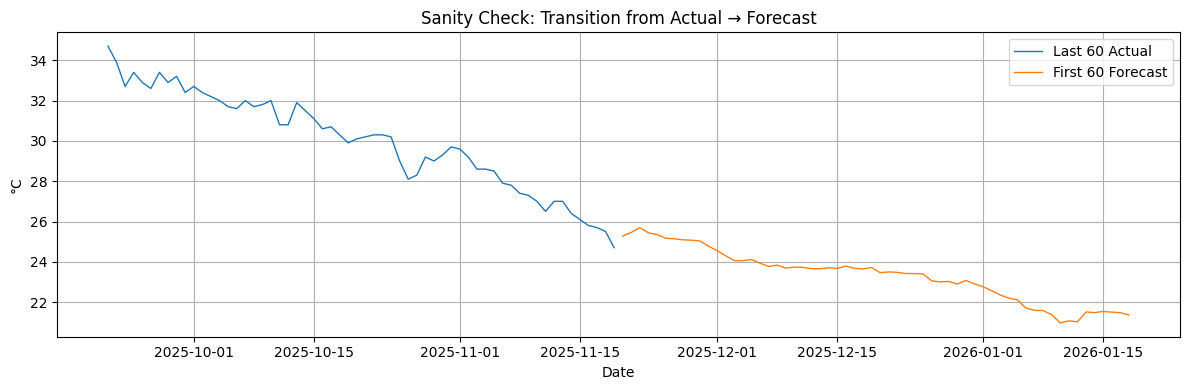

In [ ]:
# ============================
# ALL-IN-ONE: EDA → FEATURES → TRAIN → EVAL → 1-YEAR FORECAST
# Requires: df with columns ['time', 'temperature_2m_mean'] already loaded
# ============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------- 0) Basic checks & cleanup ----------
assert 'time' in df.columns and 'temperature_2m_mean' in df.columns, \
    "DataFrame df must have columns: 'time' and 'temperature_2m_mean'"

df = df.copy()
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time').reset_index(drop=True)

# ---------- 1) Quick EDA (lightweight; no numeric_only used) ----------
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nHead:")
print(df.head())

print("\nSummary stats (all columns):")
try:
    print(df.describe(include='all'))
except Exception as e:
    print("describe(include='all') failed, showing numeric only via select_dtypes:", e)
    print(df.select_dtypes(include=[np.number]).describe())

plt.figure(figsize=(12,4))
plt.plot(df['time'], df['temperature_2m_mean'], lw=1)
plt.title("Daily Mean Temperature Over Time")
plt.xlabel("Date"); plt.ylabel("°C"); plt.grid(True); plt.tight_layout()
plt.show()

# ---------- 2) Feature Engineering (time-series) ----------
work = df[['time','temperature_2m_mean']].copy()
work['month'] = work['time'].dt.month
work['day_of_year'] = work['time'].dt.dayofyear

# Seasonality (sine/cosine) with ~annual period
period = 365.25
work['sin_annual'] = np.sin(2*np.pi*work['day_of_year']/period)
work['cos_annual'] = np.cos(2*np.pi*work['day_of_year']/period)

# Lags and rolling means of the target
lag_list = [1, 7, 14]
for L in lag_list:
    work[f'lag_{L}'] = work['temperature_2m_mean'].shift(L)

roll_windows = [7, 14]
for W in roll_windows:
    work[f'roll_mean_{W}'] = work['temperature_2m_mean'].rolling(W, min_periods=W).mean()

# Drop rows with NaNs introduced by shifting/rolling
work = work.dropna().reset_index(drop=True)

# ---------- 3) Train-Test Split (time-based; last 365 days = test) ----------
target = 'temperature_2m_mean'
feature_cols = [c for c in work.columns if c not in ['time', target]]

test_days = 365
if len(work) <= test_days + 30:
    raise ValueError("Not enough rows after feature engineering to hold 365-day test. Reduce test_days or extend data.")

train = work.iloc[:-test_days]
test  = work.iloc[-test_days:]

X_train, y_train = train[feature_cols], train[target]
X_test,  y_test  = test[feature_cols],  test[target]

print(f"\nTrain size: {len(X_train)}, Test size (last {test_days} days): {len(X_test)}")
print("Features used:", feature_cols)

# ---------- 4) Train Model ----------
rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    max_depth=None,
    min_samples_leaf=1
)
rf.fit(X_train, y_train)

# ---------- 5) Evaluate on Holdout (last 365 days) ----------
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("\n=== Holdout Performance (last 365 days) ===")
print(f"MAE: {mae:.3f} °C")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {np.sqrt(mse):.3f} °C")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(12,4))
plt.plot(test['time'], y_test.values, label="Actual", lw=1)
plt.plot(test['time'], y_pred, label="Predicted", lw=1)
plt.title("Actual vs Predicted (Holdout Year)")
plt.xlabel("Date"); plt.ylabel("°C"); plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# Feature importance (quick)
imp = pd.DataFrame({'feature': feature_cols, 'importance': rf.feature_importances_}) \
        .sort_values('importance', ascending=False)
print("\nTop Feature Importances:")
print(imp.head(10))

# ---------- 6) Forecast Next 365 Days (iterative, using only calendar + lag/rolling of target) ----------
# We will forecast using the trained model and generate the needed lag/rolling values
# from the growing predicted series. This avoids needing future exogenous variables.

# Prepare a series with the last known history (at least up to max lag/rolling window)
history = df[['time','temperature_2m_mean']].copy().sort_values('time').reset_index(drop=True)
last_date = history['time'].iloc[-1]

# Keep a list of last values of target to compute lags/rolling on the fly
max_back = max(lag_list + roll_windows)
series_vals = history[target].tolist()  # historical target values

future_days = 365
future_rows = []

for i in range(1, future_days+1):
    new_date = last_date + pd.Timedelta(days=i)
    month = new_date.month
    day_of_year = new_date.timetuple().tm_yday
    sin_annual = np.sin(2*np.pi*day_of_year/period)
    cos_annual = np.cos(2*np.pi*day_of_year/period)

    # Build feature row using the current series (which includes past predictions as we loop)
    feat = {
        'month': month,
        'day_of_year': day_of_year,
        'sin_annual': sin_annual,
        'cos_annual': cos_annual
    }

    # Lags from the evolving series
    for L in lag_list:
        feat[f'lag_{L}'] = series_vals[-L]

    # Rolling means from the evolving series
    for W in roll_windows:
        if len(series_vals) >= W:
            feat[f'roll_mean_{W}'] = np.mean(series_vals[-W:])
        else:
            # Fallback: mean of what's available (rare if history is long)
            feat[f'roll_mean_{W}'] = np.mean(series_vals)

    # Align with the exact feature order used in training (some columns exist beyond these;
    # we only trained on 'feature_cols', which are calendar/lag/rolling)
    # If your original work had other columns, they are *intentionally* excluded for future forecasting.
    x_vec = pd.DataFrame([feat])[feature_cols]

    y_hat = rf.predict(x_vec)[0]
    future_rows.append({'time': new_date, 'predicted_temperature_2m_mean': y_hat})

    # Append prediction to series for next step's lags/rolling
    series_vals.append(y_hat)

future_df = pd.DataFrame(future_rows)

# ---------- 7) Visualize and Save Forecast ----------
plt.figure(figsize=(12,4))
plt.plot(future_df['time'], future_df['predicted_temperature_2m_mean'], lw=1)
plt.title("Forecasted Daily Mean Temperature (Next 365 Days)")
plt.xlabel("Date"); plt.ylabel("°C"); plt.grid(True); plt.tight_layout()
plt.show()

out_path = "abu_dhabi_temperature_forecast_next_365_days.csv"
future_df.to_csv(out_path, index=False)
print(f"\nSaved forecast to: {out_path}")

# ---------- 8) (Optional) Compare last 60 actual days vs first 60 forecasted days ----------
tail_actual = history.tail(60)
head_fore = future_df.head(60)

plt.figure(figsize=(12,4))
plt.plot(tail_actual['time'], tail_actual['temperature_2m_mean'], label="Last 60 Actual", lw=1)
plt.plot(head_fore['time'], head_fore['predicted_temperature_2m_mean'], label="First 60 Forecast", lw=1)
plt.title("Sanity Check: Transition from Actual → Forecast")
plt.xlabel("Date"); plt.ylabel("°C"); plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


Your dataset spans 2019-01-01 → 2025-11-12 (2,508 days). The model captures seasonality and persistence well (R² ≈ 0.961 on the last 365 days; RMSE ≈ 1.11 °C). Yesterday’s temperature and short rolling means drive most of the predictive power. A 365-day forecast was saved to abu_dhabi_temperature_forecast_next_365_days.csv.

1) Data snapshot

Shape: 2,508 rows × 18 columns → one daily record for ~6.9 years.

Columns: Temperatures (max/min/mean; apparent), precipitation (totals, hours), wind (speed, gust, dominant direction), solar (shortwave radiation, sunshine duration), evapotranspiration, sea-level pressure (min/max), and date.

Head (first 5 rows): Looks clean and plausible for Abu Dhabi: dry days (zero precipitation), winter temps ~21–23 °C mean, moderate winds and solar radiation.

Summary stats (high-level climate read):

Mean temperature: ~28.74 °C (min 17, max 39.1).

Max temperature: mean 33.1 °C (up to 46.5 °C).

Precipitation: very sparse; many zeros with occasional heavy outliers (max 67.7 mm in a day).

Wind: max daily wind ~23 km/h on average; gusts average ~39 km/h, up to 81 km/h.

Solar & sunshine: high shortwave radiation and long sunshine duration consistent with the region.

Pressure: typical range ~990–1026 hPa.

2) Train / test split

Train size: 2,129 days

Test size: 365 days (the most recent year used as a realistic holdout).

Time-ordered split avoids leakage from the future.

3) Features used for forecasting temperature_2m_mean

Calendar seasonality: month, day_of_year, Fourier terms sin_annual, cos_annual.

Persistence & short-memory: lag_1, lag_7, lag_14.

Smoothing context: roll_mean_7, roll_mean_14.
These turn the problem into a time-series regression that learns patterns over time.

4) Model performance (last 365 days)

MAE: 0.833 °C → average absolute error is under 1 °C.

MSE / RMSE: 1.240 / 1.113 °C → typical miss just over 1 °C, strong for daily temperature.

R²: 0.9611 → explains ~96% of variance in the holdout year.
Interpretation: The model generalizes well for recent, unseen data and captures seasonality + yesterday’s influence effectively.

5) Feature importance (what drives predictions)

lag_1 (≈ 0.874) — yesterday’s mean temp is by far the strongest predictor (thermal persistence).

roll_mean_7 (≈ 0.098) — weekly smoothing adds stable context.
3–5. lag_14, roll_mean_14, lag_7 — smaller but useful signals from two-week and one-week horizons.
6–9. Seasonality terms (cos_annual, sin_annual, day_of_year, month) — modest but steady influence to shape the annual temperature curve.
Takeaway: Daily temperature is highly autocorrelated; short rolling averages and seasonal cycle refine the forecast.

6) Forecast artifact

Saved file: abu_dhabi_temperature_forecast_next_365_days.csv

Contains the next-year daily predictions aligned to dates.

7) What to improve next (optional)

Add exogenous drivers (e.g., radiation, pressure, wind) as inputs alongside lags.

Use multiple seasonalities (weekly + yearly) with richer Fourier terms.

Try gradient boosting (XGBoost/LightGBM) or Prophet/LSTM for comparison.

Calibrate prediction intervals (quantile regression or bootstrapping) for uncertainty bands.